In [1]:
import os
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import tree

import utils

from utils import local_data
from utils import window
from utils import Scale, give_error
from utils import generate_and_avaliate_model

from utils import location_station, find_set_sunrise, find_set_sunset

%matplotlib inline
warnings.filterwarnings('ignore')

latter_size = 14
plt.rcParams['legend.fontsize'] = latter_size 
plt.rcParams['font.size'] = latter_size 
plt.rcParams['axes.labelsize'] = latter_size
plt.rcParams['xtick.labelsize'] = latter_size
plt.rcParams['ytick.labelsize'] = latter_size

In [2]:
df = pd.read_pickle('./data/sj2_analise.pkl')

In [3]:
df.head()

,vtec,vtec_dt,vtec_dt2,gvtec1,gvtec1_dt,gvtec2,gvtec2_dt,s4
2013-12-01 03:30:00,33.624428,-0.428246,-0.020502,-3.216613,0.002355,1.826065,1.991653,0.163334
2013-12-01 03:40:00,33.205025,-0.546589,-0.118343,-3.122300,0.130198,4.588494,2.530373,0.165397
2013-12-01 03:50:00,32.539631,-0.772594,-0.226005,-2.810556,0.280756,7.786990,2.862830,0.168683
2013-12-01 04:00:00,31.469337,-1.082859,-0.310265,-2.320938,0.399753,10.972091,2.894375,0.173552
2013-12-01 04:10:00,29.995466,-1.429647,-0.346788,-1.764129,0.443303,13.734955,2.621609,0.178917


# Floresta para Regressão
## Completa

In [4]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']

Error for the time series sample:
O erro quadrático médio foi: 0.004093
O erro quadrático total foi: 2.277207
O maior erro por previsão foi: 0.444015
O erro relativo foi: 14.006507%
O número de verdadeiros negativos foi: 949
O número de verdadeiros positivos foi: 118
O número de falsos negativos foi: 35
O número de falsos positivos foi: 165
O POD foi: 0.771242
O FAR foi: 0.583039
A ACC foi: 0.842147
O kappa foi: 0.032820
precission: 0.416961
recal: 0.771242
f1: 0.541284


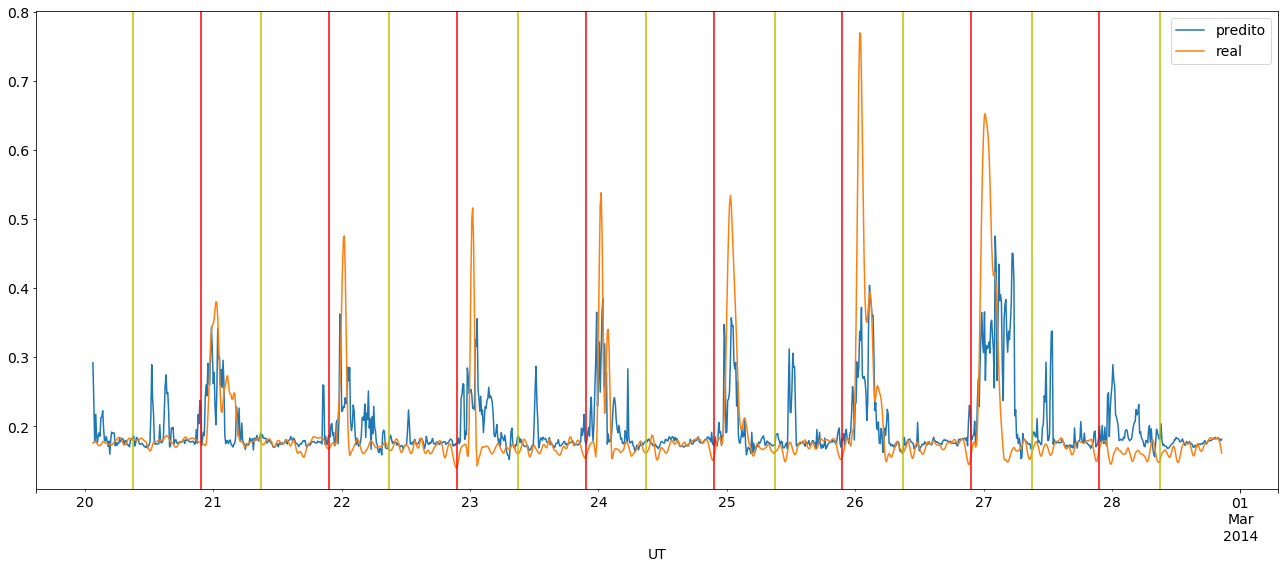

In [5]:
dict_error = generate_and_avaliate_model(df=df,
                            instances_set=instances_set,
                            target='s4',
                            file_to_save_model='./images/regression_random_florest.eps')

## Sem vtec

In [6]:
instances_set = ['vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']

Error for the time series sample:
O erro quadrático médio foi: 0.004334
O erro quadrático total foi: 2.343447
O maior erro por previsão foi: 0.513512
O erro relativo foi: 16.554027%
O número de verdadeiros negativos foi: 878
O número de verdadeiros positivos foi: 119
O número de falsos negativos foi: 34
O número de falsos positivos foi: 236
O POD foi: 0.777778
O FAR foi: 0.664789
A ACC foi: 0.786898
O kappa foi: 0.036091
precission: 0.335211
recal: 0.777778
f1: 0.468504


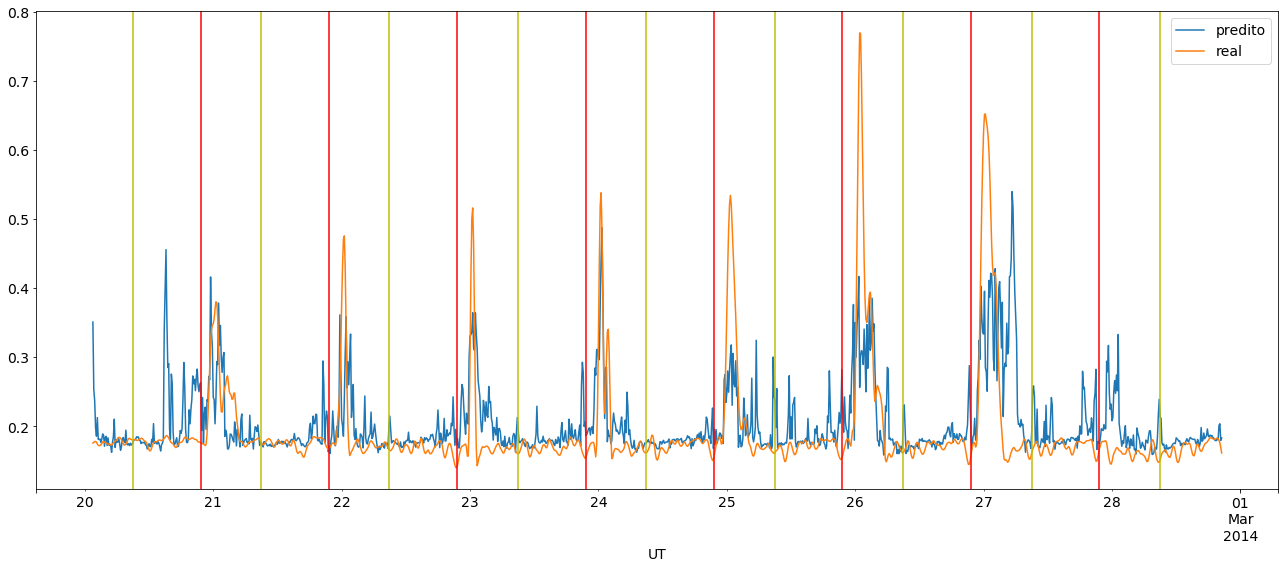

{'mse': 0.004334446846690719,
 'tse': 2.343447066770901,
 'me': 0.5135120201611454,
 're': 16.554026686422123,
 'tn': 878,
 'tp': 119,
 'fn': 34,
 'fp': 236,
 'pod': 0.7777777777777778,
 'far': 0.6647887323943662,
 'acc': 0.7868981846882399,
 'kappa': 0.0360906976874569,
 'precission': 0.3352112676056338,
 'recall': 0.7777777777777778,
 'f1': 0.46850393700787407}

In [7]:
generate_and_avaliate_model(df=df,
                            instances_set=instances_set,
                            target='s4')

## Sem derivada temporal primeira do VTEC

In [8]:
instances_set = ['vtec', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']

Error for the time series sample:
O erro quadrático médio foi: 0.004308
O erro quadrático total foi: 2.336370
O maior erro por previsão foi: 0.522743
O erro relativo foi: 14.103998%
O número de verdadeiros negativos foi: 956
O número de verdadeiros positivos foi: 122
O número de falsos negativos foi: 31
O número de falsos positivos foi: 158
O POD foi: 0.797386
O FAR foi: 0.564286
A ACC foi: 0.850829
O kappa foi: 0.030469
precission: 0.435714
recal: 0.797386
f1: 0.563510


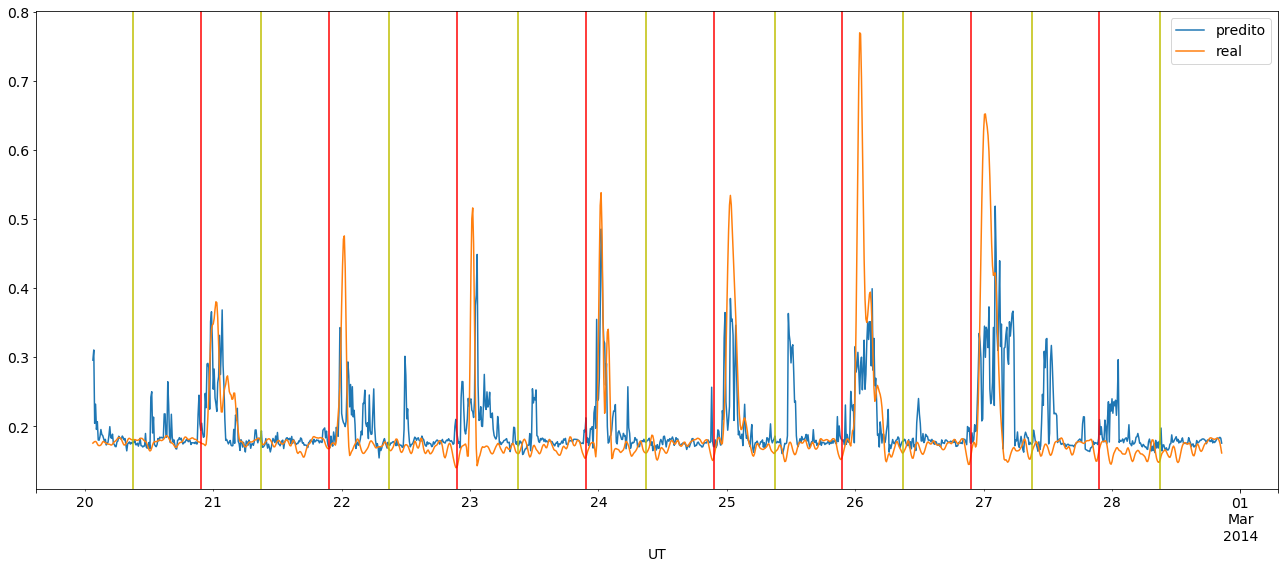

{'mse': 0.004308306752829632,
 'tse': 2.336369974091249,
 'me': 0.5227429241076147,
 're': 14.103997986619138,
 'tn': 956,
 'tp': 122,
 'fn': 31,
 'fp': 158,
 'pod': 0.7973856209150327,
 'far': 0.5642857142857143,
 'acc': 0.850828729281768,
 'kappa': 0.03046927998634514,
 'precission': 0.4357142857142857,
 'recall': 0.7973856209150327,
 'f1': 0.5635103926096998}

In [9]:
generate_and_avaliate_model(df=df,
                            instances_set=instances_set,
                            target='s4')

## Sem derivada temporal segunda do VTEC

In [10]:
instances_set = ['vtec', 'vtec_dt', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']

Error for the time series sample:
O erro quadrático médio foi: 0.004078
O erro quadrático total foi: 2.272971
O maior erro por previsão foi: 0.453506
O erro relativo foi: 14.013260%
O número de verdadeiros negativos foi: 931
O número de verdadeiros positivos foi: 122
O número de falsos negativos foi: 31
O número de falsos positivos foi: 183
O POD foi: 0.797386
O FAR foi: 0.600000
A ACC foi: 0.831097
O kappa foi: 0.031886
precission: 0.400000
recal: 0.797386
f1: 0.532751


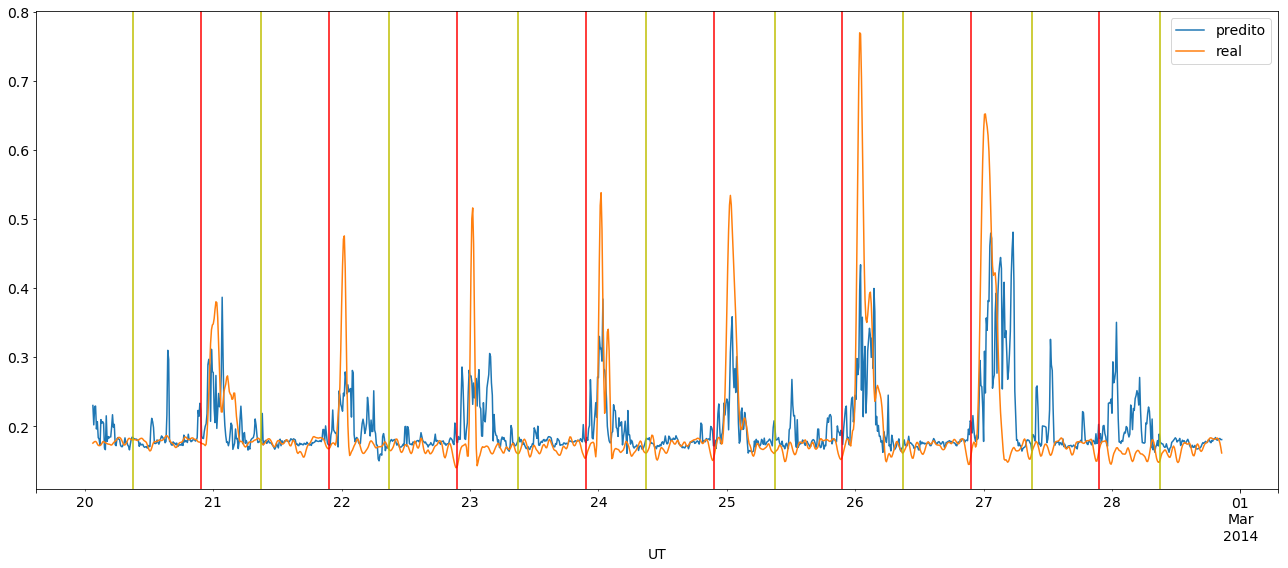

{'mse': 0.004077659872168399,
 'tse': 2.2729705361128993,
 'me': 0.45350615015229323,
 're': 14.013260426499171,
 'tn': 931,
 'tp': 122,
 'fn': 31,
 'fp': 183,
 'pod': 0.7973856209150327,
 'far': 0.6,
 'acc': 0.8310970797158642,
 'kappa': 0.03188647028665866,
 'precission': 0.4,
 'recall': 0.7973856209150327,
 'f1': 0.5327510917030568}

In [11]:
generate_and_avaliate_model(df=df,
                            instances_set=instances_set,
                            target='s4')

## Sem gradiente do VTEC em relação à Pirassununga

In [12]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']

Error for the time series sample:
O erro quadrático médio foi: 0.004748
O erro quadrático total foi: 2.452637
O maior erro por previsão foi: 0.479564
O erro relativo foi: 15.230046%
O número de verdadeiros negativos foi: 892
O número de verdadeiros positivos foi: 125
O número de falsos negativos foi: 28
O número de falsos positivos foi: 222
O POD foi: 0.816993
O FAR foi: 0.639769
A ACC foi: 0.802684
O kappa foi: 0.032845
precission: 0.360231
recal: 0.816993
f1: 0.500000


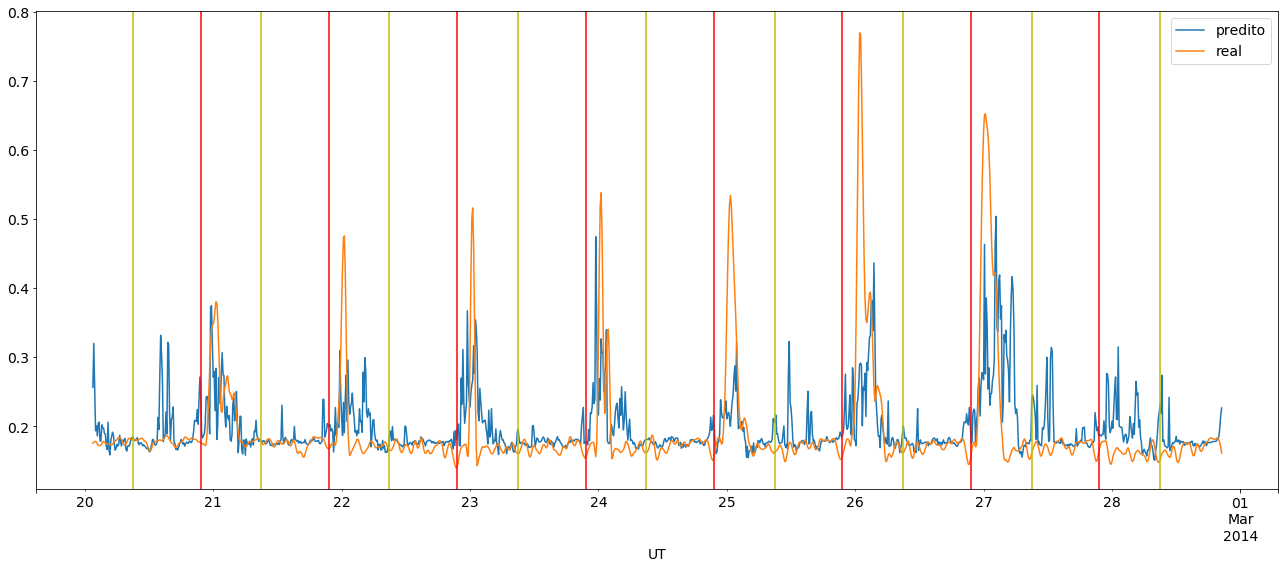

{'mse': 0.004747771224629402,
 'tse': 2.452636569409633,
 'me': 0.4795644886408359,
 're': 15.230045622381125,
 'tn': 892,
 'tp': 125,
 'fn': 28,
 'fp': 222,
 'pod': 0.8169934640522876,
 'far': 0.6397694524495677,
 'acc': 0.8026835043409629,
 'kappa': 0.032845176164541086,
 'precission': 0.36023054755043227,
 'recall': 0.8169934640522876,
 'f1': 0.4999999999999999}

In [13]:
generate_and_avaliate_model(df=df,
                            instances_set=instances_set,
                            target='s4')

## Sem derivada temporal do gradiente do VTEC em relação à Pirassununga

In [14]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec2', 'gvtec2_dt']

Error for the time series sample:
O erro quadrático médio foi: 0.004903
O erro quadrático total foi: 2.492359
O maior erro por previsão foi: 0.578730
O erro relativo foi: 14.274489%
O número de verdadeiros negativos foi: 955
O número de verdadeiros positivos foi: 122
O número de falsos negativos foi: 31
O número de falsos positivos foi: 159
O POD foi: 0.797386
O FAR foi: 0.565836
A ACC foi: 0.850039
O kappa foi: 0.030526
precission: 0.434164
recal: 0.797386
f1: 0.562212


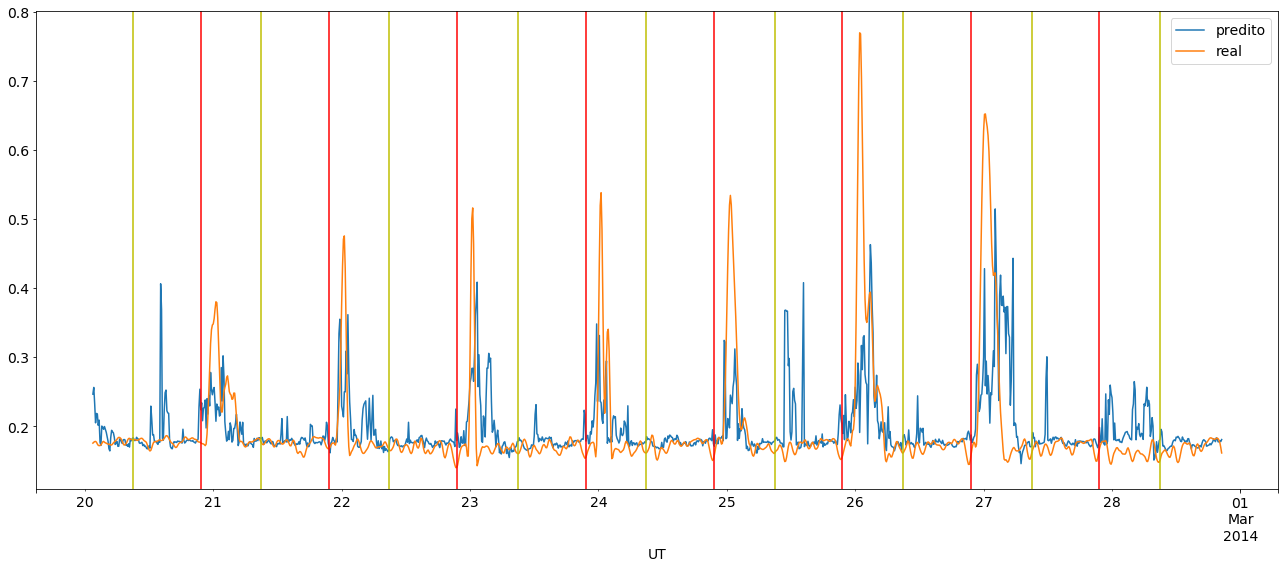

{'mse': 0.004902803055817128,
 'tse': 2.4923586161947684,
 'me': 0.5787297159247575,
 're': 14.27448877614995,
 'tn': 955,
 'tp': 122,
 'fn': 31,
 'fp': 159,
 'pod': 0.7973856209150327,
 'far': 0.5658362989323843,
 'acc': 0.8500394632991318,
 'kappa': 0.03052596759835768,
 'precission': 0.43416370106761565,
 'recall': 0.7973856209150327,
 'f1': 0.5622119815668203}

In [15]:
generate_and_avaliate_model(df=df,
                            instances_set=instances_set,
                            target='s4')

## Sem gradiente do VTEC em relação à Brasília

In [16]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2_dt']

Error for the time series sample:
O erro quadrático médio foi: 0.004762
O erro quadrático total foi: 2.456342
O maior erro por previsão foi: 0.484472
O erro relativo foi: 15.634067%
O número de verdadeiros negativos foi: 891
O número de verdadeiros positivos foi: 129
O número de falsos negativos foi: 24
O número de falsos positivos foi: 223
O POD foi: 0.843137
O FAR foi: 0.633523
A ACC foi: 0.805051
O kappa foi: 0.031241
precission: 0.366477
recal: 0.843137
f1: 0.510891


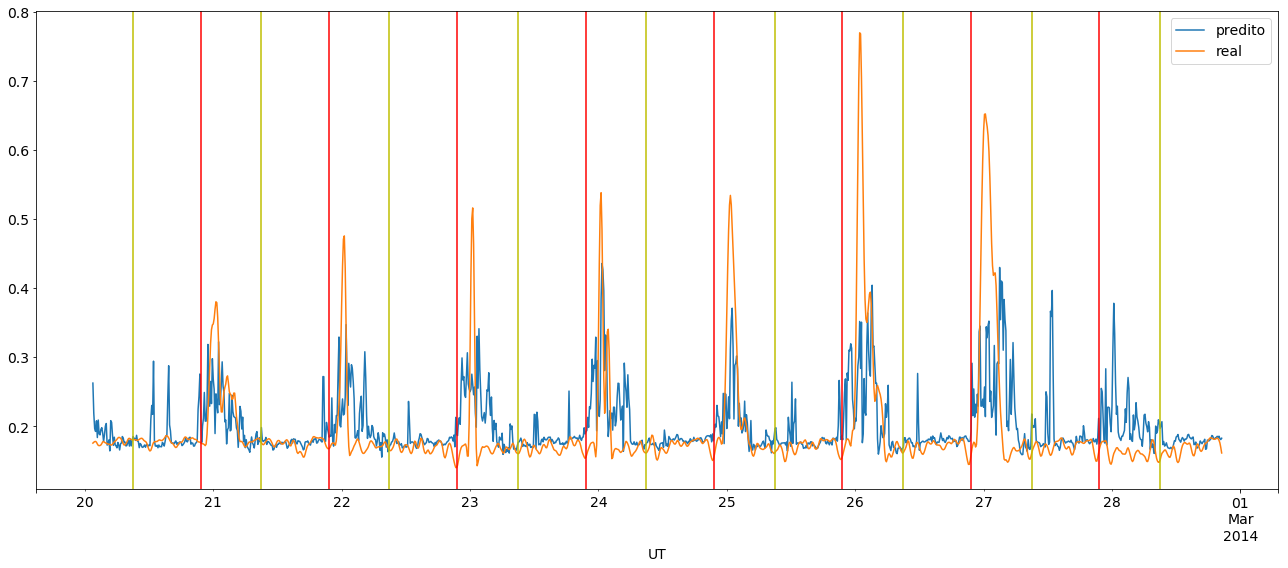

{'mse': 0.00476212944833738,
 'tse': 2.4563424050900275,
 'me': 0.4844723640955505,
 're': 15.634066855371156,
 'tn': 891,
 'tp': 129,
 'fn': 24,
 'fp': 223,
 'pod': 0.8431372549019608,
 'far': 0.6335227272727273,
 'acc': 0.8050513022888713,
 'kappa': 0.031241103626823582,
 'precission': 0.3664772727272727,
 'recall': 0.8431372549019608,
 'f1': 0.5108910891089109}

In [17]:
generate_and_avaliate_model(df=df,
                            instances_set=instances_set,
                            target='s4')

## Sem derivada temporal do gradiente do VTEC em relação à Brasília

In [18]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2']

Error for the time series sample:
O erro quadrático médio foi: 0.003990
O erro quadrático total foi: 2.248515
O maior erro por previsão foi: 0.435277
O erro relativo foi: 13.802753%
O número de verdadeiros negativos foi: 940
O número de verdadeiros positivos foi: 122
O número de falsos negativos foi: 31
O número de falsos positivos foi: 174
O POD foi: 0.797386
O FAR foi: 0.587838
A ACC foi: 0.838200
O kappa foi: 0.031376
precission: 0.412162
recal: 0.797386
f1: 0.543430


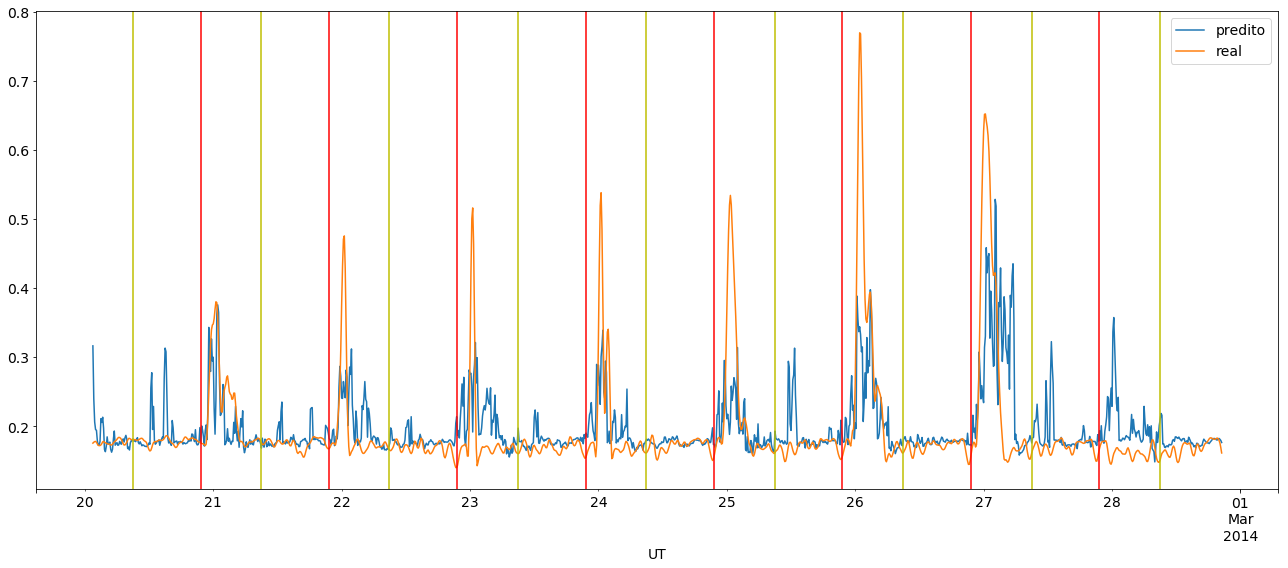

{'mse': 0.003990385845240793,
 'tse': 2.2485148133646096,
 'me': 0.43527706769332714,
 're': 13.802753275269955,
 'tn': 940,
 'tp': 122,
 'fn': 31,
 'fp': 174,
 'pod': 0.7973856209150327,
 'far': 0.5878378378378378,
 'acc': 0.8382004735595896,
 'kappa': 0.031376281778545796,
 'precission': 0.41216216216216217,
 'recall': 0.7973856209150327,
 'f1': 0.5434298440979956}

In [19]:
generate_and_avaliate_model(df=df,
                            instances_set=instances_set,
                            target='s4')